# Capstone Project 2: Canada EV Chargers Analysis

# Table of contents
* [1.0 Introduction](#1.0_Introduction)
* [2.0 Data Wrangling](#2.0_Data_Wrangling)
* [3.0 EDA](#3.0_EDA)
* [4.0 Pre-processing and Training Data Development](#4.0_Pre-processing_and_Training_Data_Development)
* [5.0 Training and Testing](#5.0_Training_and_Testing)

# 1.0 Introduction <a id="1.0_Introduction"></a>


## 1.1 Problem Statement 
What opportunity exist for EV Station to enter Canadian EV Charging Market, especially for Ontario, through installing new Public EV Chargers, as the emerging trend of using Electrical Vehicles.

## 1.2 Context
EV Station is a start-up company providing multi-type EV Chargers for all types of EVs on the market. The company has successfully installed over 10K EV Chargers over 10 states in the United States, and are looking to enter the Canadian EV charging market. EV Station data science team was consulted by the management team for estimating the Canadian market size. The management would like to investigate the estimated number of additional EV chargers needed currently in Canada, revenue for the company if they fill the gap, and how it will be needed in the next few years. 

## 1.3 Criteria for Success
The addition of EV chargers in Ontario will be estimated for the management team to study the feasibility of entering the Canadian Market.

## 1.4 Scope of Solution Space
Ontario/Toronto will be the target area of estimating the number of EV Chargers. Both American and Canadian data will be used, as they share a similar lifestyle and market.

## 1.5 Constraints
The number of home-installed EV charger or private-shared EV charger data could not be collected. So we will focus on the public paid/unpaid charger



# 2.0 Data Wrangling <a id="2.0_Data_Wrangling"></a>

As the second step of the project, data collection, define data, and dataset cleaning are completed. The data will be kept updated if necessary.

In [1]:
##import any necessary packages here:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

### 2.1 Canadian and United States Alternative Fuel Charging Station Database:
https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/electric-charging-alternative-fuelling-stationslocator-map/20487#/find/nearest

This database will provide 53292 charging stations in the United States and Canada. The basic information of the charging stations include location of each charging station, type of chargers, coordinates, number of chargers, charger speed, etc.

As the first step, this dataset will be loaded to this notebook.

In [2]:
# the supplied CSV data file is the raw_data directory
charger_data = pd.read_csv('../raw_data/alt_fuel_stations.csv')

/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,39,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#first glance of the dataset
charger_data.head()

Fuel Type Code                    Station Name           Street Address  \
0           ELEC   Los Angeles Convention Center       1201 S Figueroa St   
1           ELEC  California Air Resources Board         9530 Telstar Ave   
2           ELEC          Scripps Green Hospital  10666 N Torrey Pines Rd   
3           ELEC                   Galpin Motors        15421 Roscoe Blvd   
4           ELEC               Galleria at Tyler   1299 Galleria at Tyler   

              Intersection Directions         City State    ZIP  Plus4  \
0            West hall and South hall  Los Angeles    CA  90015    NaN   
1                                 NaN     El Monte    CA  91731    NaN   
2  Patient Parking Structure, level G     La Jolla    CA  92037    NaN   
3                                 NaN    Sepulveda    CA  91343    NaN   
4                                 NaN    Riverside    CA  92503    NaN   

  Station Phone Status Code  ...  EV Pricing (French) LPG Nozzle Types  \
0  213-741-1151           E  ...                  NaN              NaN   
1  626-575-6800           E  ...                  NaN              NaN   
2           NaN           E  ...                  NaN              NaN   
3  800-256-6219           E  ...                  NaN              NaN   
4  951-351-3110           E  ...                  NaN              NaN   

  Hydrogen Pressures Hydrogen Standards  CNG Fill Type Code  CNG PSI  \
0                NaN                NaN                 NaN      NaN   
1                NaN                NaN                 NaN      NaN   
2                NaN                NaN                 NaN      NaN   
3                NaN                NaN                 NaN      NaN   
4                NaN                NaN                 NaN      NaN   

   CNG Vehicle Class  LNG Vehicle Class  EV On-Site Renewable Source  \
0                NaN                NaN                          NaN   
1                NaN                NaN                          NaN   
2                NaN                NaN                          NaN   
3                NaN                NaN                          NaN   
4                NaN                NaN                          NaN   

   Restricted Access  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 65 columns]

In [4]:
#Call the info method on charger_data to see a summary of the data
charger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53291 entries, 0 to 53290
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    53291 non-null  object 
 1   Station Name                      53291 non-null  object 
 2   Street Address                    53290 non-null  object 
 3   Intersection Directions           2148 non-null   object 
 4   City                              53291 non-null  object 
 5   State                             53291 non-null  object 
 6   ZIP                               53290 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52666 non-null  object 
 9   Status Code                       53291 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           53291 non-null  object 
 12  Acce

As we can see, multiple columns are empty columns. These columns might be for other alternative fuel stations and do not have any relationships with the EV chargers. So we should drop all of them for further processes.

In [5]:
# Find the columns where each value is null
empty_cols = [col for col in charger_data.columns if charger_data[col].isnull().all()]
# Drop these columns from the dataframe
charger_data.drop(empty_cols,axis=1,inplace=True)

#We may drop other duplicate columns and useless columns, such as the ones in French, and federal agency name/codes
#'Intersection Directions (French)','Access Days Time (French)','Groups With Access Code (French)','EV Pricing (French)', 'Federal Agency ID','Federal Agency Name','Federal Agency Code']
charger_data.drop(['Cards Accepted','Intersection Directions (French)','Access Days Time (French)','Groups With Access Code (French)','EV Pricing (French)', 'Federal Agency ID','Federal Agency Name','Federal Agency Code'],axis=1,inplace=True)

In [6]:
#Explore one of the columns
charger_data.iloc[:1].transpose()

0
Fuel Type Code                                        ELEC
Station Name                 Los Angeles Convention Center
Street Address                          1201 S Figueroa St
Intersection Directions           West hall and South hall
City                                           Los Angeles
State                                                   CA
ZIP                                                  90015
Station Phone                                 213-741-1151
Status Code                                              E
Groups With Access Code                             Public
Access Days Time                   24 hours daily; pay lot
EV Level1 EVSE Num                                     NaN
EV Level2 EVSE Num                                    12.0
EV DC Fast Count                                       NaN
EV Other Info                                          NaN
EV Network                                   Non-Networked
EV Network Web                                         NaN
Geocode Status                                         GPS
Latitude                                         34.040539
Longitude                                      -118.271387
Date Last Confirmed                             2020-11-09
ID                                                    1523
Updated At                         2021-03-11 23:22:17 UTC
Owner Type Code                                          P
Open Date                                       1995-08-30
EV Connector Types                                   J1772
Country                                                 US
Access Code                                         public
Access Detail Code                                     NaN
Facility Type                               PARKING_GARAGE
EV Pricing                                             NaN
EV On-Site Renewable Source                            NaN

### 2.1.1 Data Cleaning

Within the current features, we may care about some important ones, including location (states/city), number of EV chargers, EV charger types (Level 1, 2, or DC Fast), EV Connector Types, Country. All other features are less important the others. We may also visualize the installation dates, as EV chargers may have its service life, or they should be updated after a few years becasue of the technology advancement.

As the next step, we will clean the important features. For example, fill the NaN data can help to calculate in the further steps.

#### Number of Different Charging Ports

In [7]:
#Fill the number of three types of EV charger NaN to 0
charger_data['EV Level1 EVSE Num']=charger_data['EV Level1 EVSE Num'].fillna(0)
charger_data['EV Level2 EVSE Num']=charger_data['EV Level2 EVSE Num'].fillna(0)
charger_data['EV DC Fast Count']=charger_data['EV DC Fast Count'].fillna(0)

In [8]:
charger_data['Total Ports'] = charger_data['EV Level1 EVSE Num'] + charger_data['EV Level2 EVSE Num']+charger_data['EV DC Fast Count']

In [9]:
#Melt the charging ports data
charger_type = pd.melt(charger_data[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count','State','Country']], 
                        id_vars=['Country','State'], 
                        var_name='Charger Type', 
                        value_vars=['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'], 
                        value_name='Number of Charger')

In [10]:
charger_type= charger_type[charger_type['Number of Charger'] != 0]
charger_type.head()

Country State        Charger Type  Number of Charger
22      US    CA  EV Level1 EVSE Num                1.0
39      US    CA  EV Level1 EVSE Num               12.0
47      US    CA  EV Level1 EVSE Num                4.0
54      US    CA  EV Level1 EVSE Num                1.0
57      US    CA  EV Level1 EVSE Num                1.0

In [11]:
charger_count=charger_type.groupby(['Country','State'])['Charger Type'].value_counts()
charger_count=charger_count.to_frame(name='Counts').reset_index()

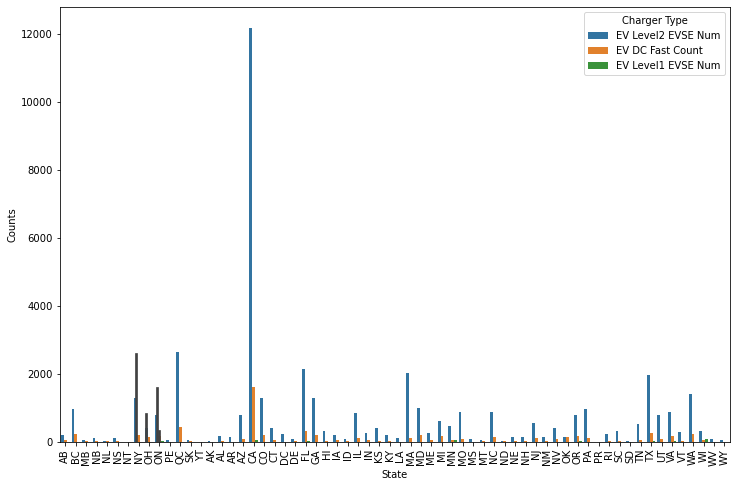

In [12]:
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'State',
            y = 'Counts',
            hue = 'Charger Type',
            data = charger_count)

plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('State');

As we can see in the above figure:
1) California, US has the most EV Level 2 Chargers and the DC Fast Chargers

2) Quebec, Canada has the second most EV Level 2 Chargers and DC Fast Chargers, however, there is a big gap between QC and CA. CA is about 5 times more chargers than QC.

3) It seems that the more Level 2 Chargers are installed, the more DC Fast Chargers were installed in the same state/province.

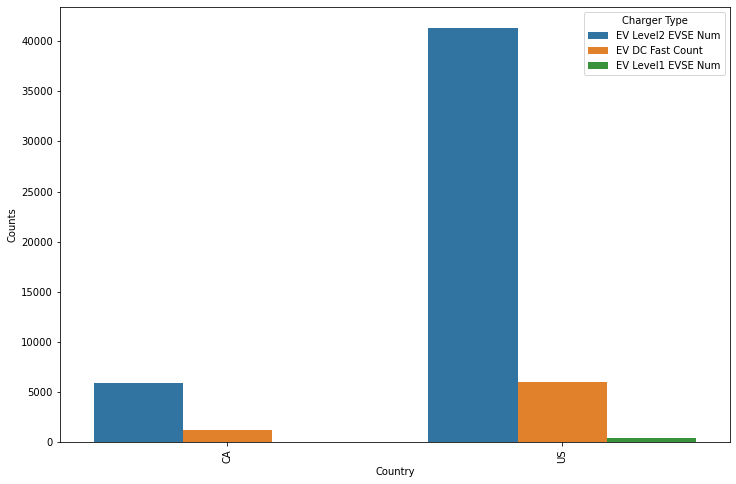

In [13]:
charger_country_count=charger_type.groupby(['Country'])['Charger Type'].value_counts()
charger_country_count=charger_country_count.to_frame(name='Counts').reset_index()
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'Country',
            y = 'Counts',
            hue = 'Charger Type',
            data = charger_country_count)

plt.xticks(rotation='vertical')
plt.ylabel('Counts')
plt.xlabel('Country');

As we can see in the above figure:
1) the US has much more charging stations then Canada for all three types of chargers

2) the Level 2 EVSE is the dominant charging types in both Canada and US. The EV level 2 charger is about 4 to 5 times of DC fast chargers

3) the EV level 1 is very minor in both Canada and US

#### Open Date

In [14]:
#We also wanted to transform the Open Date data as a datetime data, however, 
#we found some errors in the datetime data.
charger_data['Open Date']=charger_data['Open Date'].fillna('2020-01-01')
charger_data.replace('0207-05-15','2017-05-15',inplace=True)

In [15]:
#Convert Open Date from Object to a datetime
charger_data['Open Date']=pd.to_datetime(charger_data['Open Date'])

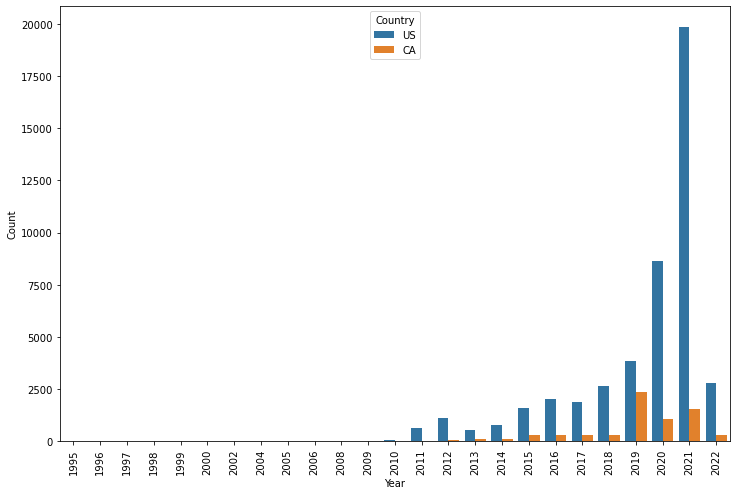

In [16]:
#Visualize the number of new stations were opened from 1995 to 2022
charger_data['Open Year']=charger_data['Open Date'].dt.year

plt.subplots(figsize=(12, 8))

ax = sns.countplot(x='Open Year', hue='Country', data=charger_data)

plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.xlabel('Year');
plt.show()

From the above figure, we can see that
1) the most number of chargers were installed in 2021 in the US. But the most number of chargers were installed in 2019 for Canada. *Why this difference happens?

2) it was also more than two times of new chargers installed in 2021 than in 2020 in the US.

3) it was also more than two times of new chargers installed in 2019 than in 2020 in the Canada.

#### Charger Types

In [17]:
#Inspect the type of EV connectors
charger_data['EV Connector Types'].value_counts()

J1772                               40424
CHADEMO J1772COMBO                   3788
TESLA                                3773
J1772 TESLA                          2857
CHADEMO J1772 J1772COMBO             1024
J1772COMBO                            483
CHADEMO J1772                         322
NEMA520                               189
CHADEMO                               110
J1772 J1772COMBO                       82
J1772 NEMA515                          73
J1772 NEMA520                          63
NEMA1450                               39
NEMA515                                26
J1772 NEMA1450                         13
CHADEMO J1772 J1772COMBO TESLA          5
CHADEMO J1772COMBO TESLA                2
CHADEMO J1772 NEMA520 TESLA             1
CHADEMO J1772 NEMA515                   1
J1772 NEMA515 NEMA520                   1
NEMA1450 NEMA520                        1
CHADEMO J1772 NEMA520                   1
NEMA1450 NEMA515                        1
CHADEMO J1772 J1772COMBO NEMA520  

As we can see above, there are mutiple types of chargers, and some of them are really messy. Based on my research we may classify the types of EV Connector Types to the following:
1. J1772
2. Tesla
3. J1772COMBO also called CCS COMBO
4. NEMA (including NEMA520, NEMA515, NEMA1450)
5. CHADEMO

https://blinkcharging.com/understanding-ev-charging-plugs/?locale=en

As a result, we may want to change some of the connector types into standard format, or we can split the connector types into four different columns. Use 1 or 0 to stand for whether they have the connector or not.

In [18]:
#5 new columns are created to define each type of the charging connector
charger_data['TESLA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("TESLA"), 1,0)
charger_data['NEMA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("NEMA"), 1,0)
charger_data['CCS'] = pd.np.where(charger_data['EV Connector Types'].str.contains("COMBO"), 1,0)
charger_data['CHADEMO'] = pd.np.where(charger_data['EV Connector Types'].str.contains("CHADEMO"), 1,0)
charger_data['J1772'] = pd.np.where(charger_data['EV Connector Types'].str.contains("J1772"), 1,0)-charger_data['CCS']+pd.np.where(charger_data['EV Connector Types'].str.contains("J1772 J1772COMBO"), 1,0)

/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_30187/2827256825.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['TESLA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("TESLA"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_30187/2827256825.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['NEMA'] = pd.np.where(charger_data['EV Connector Types'].str.contains("NEMA"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_30187/2827256825.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  charger_data['CCS'] = pd.np.where(charger_data['EV Connector Types'].str.contains("COMBO"), 1,0)
/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykern

In [19]:
charger_data.head()

Fuel Type Code                    Station Name           Street Address  \
0           ELEC   Los Angeles Convention Center       1201 S Figueroa St   
1           ELEC  California Air Resources Board         9530 Telstar Ave   
2           ELEC          Scripps Green Hospital  10666 N Torrey Pines Rd   
3           ELEC                   Galpin Motors        15421 Roscoe Blvd   
4           ELEC               Galleria at Tyler   1299 Galleria at Tyler   

              Intersection Directions         City State    ZIP Station Phone  \
0            West hall and South hall  Los Angeles    CA  90015  213-741-1151   
1                                 NaN     El Monte    CA  91731  626-575-6800   
2  Patient Parking Structure, level G     La Jolla    CA  92037           NaN   
3                                 NaN    Sepulveda    CA  91343  800-256-6219   
4                                 NaN    Riverside    CA  92503  951-351-3110   

  Status Code Groups With Access Code  ...   Facility Type   EV Pricing  \
0           E                  Public  ...  PARKING_GARAGE          NaN   
1           E                  Public  ...       STATE_GOV         Free   
2           E                  Public  ...        HOSPITAL  Pay to Park   
3           E     Public - Call ahead  ...      CAR_DEALER         Free   
4           E                  Public  ...   SHOPPING_MALL         Free   

   EV On-Site Renewable Source  Total Ports Open Year TESLA NEMA CCS  CHADEMO  \
0                          NaN         12.0      1995     0    0   0        0   
1                          NaN          3.0      1996     0    0   0        0   
2                          NaN          1.0      1997     0    0   0        0   
3                          NaN          2.0      2012     0    0   0        0   
4                          NaN          4.0      1997     0    0   0        0   

   J1772  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 39 columns]

Visualize the charging stations by states and country

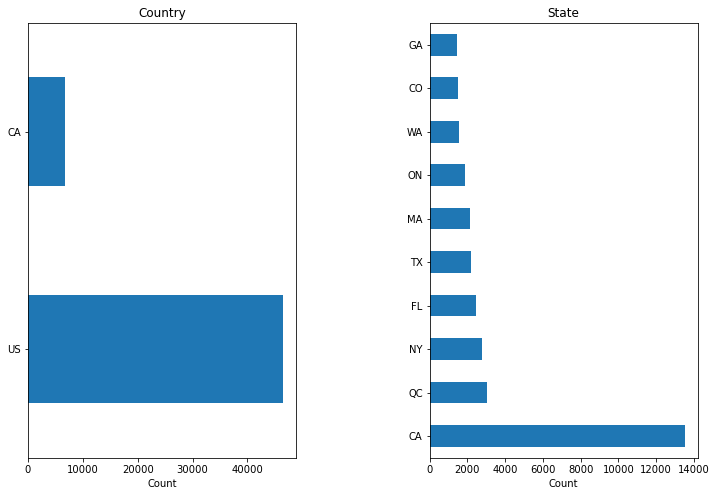

In [20]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data['Country'].value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Country')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data['State'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('State')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

Visualize the charging ports by states and country

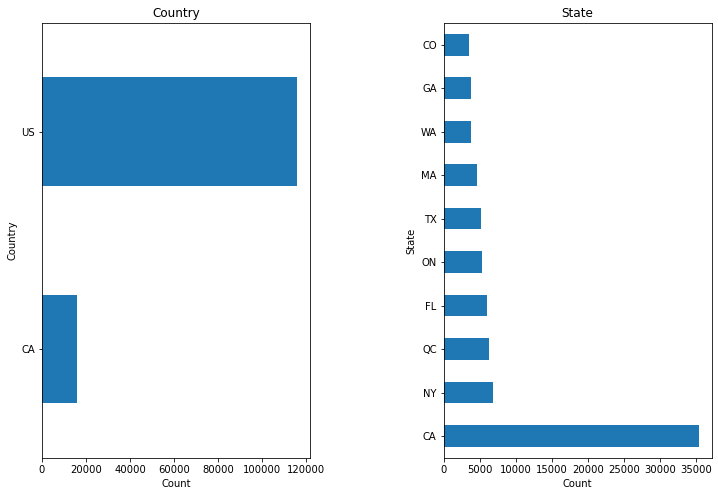

In [21]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data.groupby('Country')['Total Ports'].sum().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Country')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
charger_data.groupby('State')['Total Ports'].sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('State')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

As we can see from the above two figures:
1) US has many more charging stations and charging ports, compare to Canada.

2) California has the most charging station and charging ports. The gap between the 2nd most province/state is really large. 

3) Quebec has the 2nd most number of charging stations, but New York has the 2nd most charging ports. This indicated that each New York's charging stations may have more charging ports.

In [22]:
# Create a clean dataset called charger_clean. This dataset will only contain the type of ports, total ports, and total number of stations
charger_clean=charger_data.groupby('State')[['Total Ports','TESLA','NEMA','CCS','CHADEMO','J1772']].agg(np.sum)

In [23]:
# count the number of stations
charger_number=charger_data.groupby('State').count()
charger_number=charger_number['Fuel Type Code']
charger_clean['Total Stations']=charger_number
charger_clean=charger_clean.reset_index()

### 2.1 Canadian and United States EV Registration and Other Data:

Source:
Statistics Canada, United States Census Bureau

Multiple datasets have been merged into one excel file prior to loading into this Worksheet.

In [24]:
EVReg = pd.read_excel('../raw_data/US&CA STATES DATE.xlsx')
EVReg.head()

Code          Province  Pop2016    GDP (2020)  2020 EV Registration  \
0   AB           Alberta  4067175  307522000000                     0   
1   BC  British Columbia  4648055  246927400000                  8133   
2   MB          Manitoba  1278365   60545400000                   141   
3   NB     New Brunswick   747101   30051500000                    53   
4  NFL      Newfoundland   519716   30137800000                     0   

   2019 Total Registrated Cars Country  Total Area km2  Land km2  Water km2  
0                      3151829      CA        661848.0  642317.0    19531.0  
1                      3113125      CA        944735.0  925186.0    19549.0  
2                       808918      CA        647797.0  553556.0    94241.0  
3                       553244      CA         72908.0   71450.0     1458.0  
4                       350761      CA        405212.0  373872.0    31340.0

In [25]:
EVReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code                         64 non-null     object 
 1   Province                     64 non-null     object 
 2   Pop2016                      64 non-null     int64  
 3   GDP (2020)                   64 non-null     int64  
 4   2020 EV Registration         64 non-null     int64  
 5   2019 Total Registrated Cars  64 non-null     int64  
 6   Country                      64 non-null     object 
 7   Total Area km2               64 non-null     float64
 8   Land km2                     64 non-null     float64
 9   Water km2                    64 non-null     float64
dtypes: float64(3), int64(4), object(3)
memory usage: 5.1+ KB


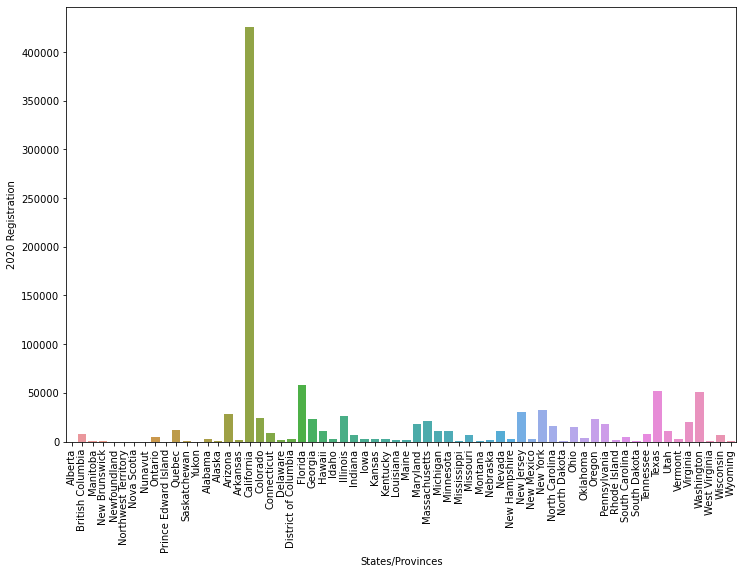

In [26]:
plt.subplots(figsize=(12, 8))

sns.barplot(x = 'Province',
            y = '2020 EV Registration',
            data = EVReg)

plt.xticks(rotation='vertical')
plt.ylabel('2020 Registration')
plt.xlabel('States/Provinces');

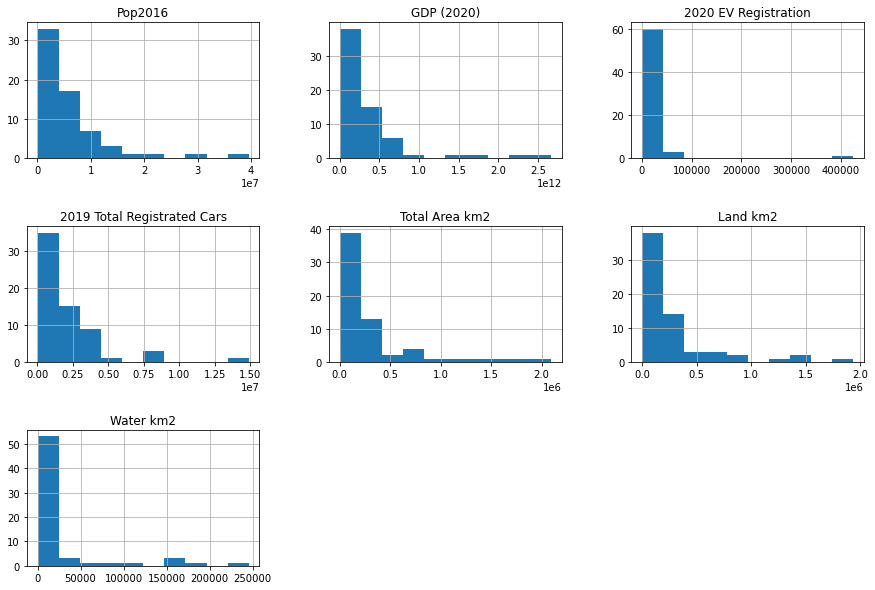

In [27]:
EVReg.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [28]:
EVReg[EVReg['2020 EV Registration']==0]

Code             Province  Pop2016    GDP (2020)  2020 EV Registration  \
0    AB              Alberta  4067175  307522000000                     0   
4   NFL         Newfoundland   519716   30137800000                     0   
5   NWT  Northwest Territory    41786    4035800000                     0   
6    NS          Nova Scotia   923598   36950100000                     0   
7    NU              Nunavut    35944    3163600000                     0   
12   YT                Yukon    35874    2686900000                     0   

    2019 Total Registrated Cars Country  Total Area km2   Land km2  Water km2  
0                       3151829      CA        661848.0   642317.0    19531.0  
4                        350761      CA        405212.0   373872.0    31340.0  
5                         23242      CA       1346106.0  1183085.0   163021.0  
6                        600756      CA         55284.0    53338.0     1946.0  
7                          4927      CA       2093190.0  1936113.0   157077.0  
12                        35651      CA        482443.0   474391.0     8052.0

As we can see above, there are 6 provinces in Canada that has 0 EV Registration, which is potentially impossible. For the modeling purposes, we may not be able to use them as a good tool. So we have to leave these data.

In [29]:
# Create a new dataset called EV_Clean without any 0 values
EV_Clean=EVReg[EVReg['2020 EV Registration']!=0]
EV_Clean[EV_Clean['2020 EV Registration']==0]

Empty DataFrame
Columns: [Code, Province, Pop2016, GDP (2020), 2020 EV Registration, 2019 Total Registrated Cars, Country, Total Area km2, Land km2, Water km2]
Index: []

# 3.0 EDA <a id="3.0_EDA"></a>

Now that I have two cleaned data sets after cleaning:
1) charger_clean: contains the number of charging stations by states with different types and total ports

2) EV_Clean: contains the registrated electrical vehicles by states with some basic information of the states, including Population, GDP, Total Area, Land Area.

We can merge the two datasets together

In [30]:
#Inner join the two datasets
df=pd.merge(charger_clean, EV_Clean, left_on='State', right_on='Code')
df.head()

State  Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations Code  \
0    AK         88.0     13     0    5        6     34              48   AK   
1    AL        526.0     50     0   16       19    161             195   AL   
2    AR        457.0     39     0    8        7    136             160   AR   
3    AZ       2283.0    137     1   54       52    735             875   AZ   
4    BC       2953.0    183     8  196      183    904            1181   BC   

           Province  Pop2016    GDP (2020)  2020 EV Registration  \
0            Alaska   724357   50161000000                   940   
1           Alabama  4934193  196906100000                  2890   
2          Arkansas  3033946  114943500000                  1330   
3           Arizona  7520103  320550600000                 28770   
4  British Columbia  4648055  246927400000                  8133   

   2019 Total Registrated Cars Country  Total Area km2      Land km2  \
0                       178516      US    1.723338e+06  1.477954e+06   
1                      2109108      US    1.357673e+05  1.311700e+05   
2                       886647      US    1.377331e+05  1.347701e+05   
3                      2405959      US    2.952330e+05  2.942073e+05   
4                      3113125      CA    9.447350e+05  9.251860e+05   

      Water km2  
0  245383.42257  
1    4597.23225  
2    2960.35857  
3    1025.63604  
4   19549.00000

## 3.1 Explore Individual Variables

In [31]:
#Summarize the d
df.describe()

Total Ports        TESLA       NEMA          CCS      CHADEMO  \
count     58.000000    58.000000  58.000000    58.000000    58.000000   
mean    2256.517241   113.482759   7.206897    91.206897    89.137931   
std     4756.119239   170.409233  13.899083   177.515382   176.342713   
min       88.000000     3.000000   0.000000     3.000000     0.000000   
25%      361.750000    30.250000   1.000000    16.000000    14.500000   
50%      934.000000    74.500000   2.000000    34.500000    35.500000   
75%     2418.500000   131.000000   7.000000   107.250000   114.250000   
max    35417.000000  1118.000000  80.000000  1277.000000  1277.000000   

              J1772  Total Stations       Pop2016    GDP (2020)  \
count     58.000000       58.000000  5.800000e+01  5.800000e+01   
mean     767.637931      911.189655  6.221917e+06  3.801082e+11   
std     1593.058216     1833.373771  7.181024e+06  5.222593e+11   
min       34.000000       48.000000  1.429070e+05  5.882600e+09   
25%      125.500000      154.750000  1.380760e+06  7.597552e+10   
50%      300.000000      402.000000  4.385076e+06  2.106651e+11   
75%      828.000000      993.750000  7.727732e+06  4.667838e+11   
max    11728.000000    13512.000000  3.961349e+07  2.663666e+12   

       2020 EV Registration  2019 Total Registrated Cars  Total Area km2  \
count             58.000000                 5.800000e+01    5.800000e+01   
mean           18001.379310                 2.204356e+06    2.547262e+05   
std            56051.762759                 2.588063e+06    3.392992e+05   
min               15.000000                 1.015940e+05    1.770000e+02   
25%             1927.500000                 5.654755e+05    9.230724e+04   
50%             5501.500000                 1.387260e+06    1.519534e+05   
75%            17195.000000                 2.783440e+06    2.526231e+05   
max           425300.000000                 1.489491e+07    1.723338e+06   

           Land km2      Water km2  
count  5.800000e+01      58.000000  
mean   2.341034e+05   20622.972615  
std    3.002602e+05   46037.507236  
min    1.580000e+02       0.000000  
25%    8.310954e+04    1605.793800  
50%    1.420312e+05    4153.048965  
75%    2.399671e+05   13238.086387  
max    1.477954e+06  245383.422570

As shown above, we have data for 58 states or provinces in the US or Canada. 

For chargers:
The average number of stations are 911 for each province. The maximum number of stations are 13,512. But there are also states where only 48 stations were installed. The median number of stations are 402.

For EVs:
The average 2020 registrated cars are around 18001. The maximum EV registration si 425K and minimum registration number is 15, which is very small.

### 3.1.1 Permutation Test

Also, as shown above, the mean and standard deviation for Tesla and CCS are very close. But the average number of Tesla is greater than CCS. We assume that the EV Charger company can install all types of chargers, and they want to see two charging types TESLA and CCS, as they can provide Level 3 Fast Charging and more EV Manufactures are increasingly using.

The EV Charger Company wants to verify if they should evenly install these two types of chargers or more Tesla.

To test this, we will use the permutation method to test the difference if it is statistically significant.

Null Hypothesis: there is no difference for the average number of Tesla chargers and CCS chargers

In [32]:
#Create a new EV Charging Type
TYPE = df['TESLA']
TYPE = pd.DataFrame(TYPE)
TYPE.columns=['Number']
TYPE=TYPE.assign(charger='TESLA')


CCS = df['CCS']
CCS = pd.DataFrame(CCS)
CCS.columns=['Number']
CCS=CCS.assign(charger='CCS')

TYPE = TYPE.append(CCS,ignore_index=True)
TYPE

Number charger
0        13   TESLA
1        50   TESLA
2        39   TESLA
3       137   TESLA
4       183   TESLA
..      ...     ...
111      28     CCS
112     160     CCS
113      39     CCS
114       3     CCS
115       3     CCS

[116 rows x 2 columns]

In [33]:
difference=[]

for i in range(1000):
    TYPE[i] = np.random.permutation(TYPE['Number'])
    difference.append(TYPE.groupby('charger')[i].agg(np.mean)['TESLA'] - TYPE.groupby('charger')[i].agg(np.mean)['CCS'])

/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_30187/468799257.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TYPE[i] = np.random.permutation(TYPE['Number'])


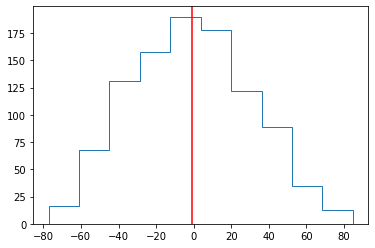

In [34]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo=plt.hist(difference,histtype='step')
# Draw the mean of the difference list
plt.axvline(x=np.mean(difference),color='red')
plt.show()

In [35]:
# Calculate the observed difference between TESLA and CCS as a criteria for calcualting p values
obs_difference=TYPE.groupby('charger')['Number'].agg(np.mean)['TESLA'] - TYPE.groupby('charger')['Number'].agg(np.mean)['CCS']
obs_difference=abs(obs_difference)

# Print out the obseved difference
print(obs_difference)

22.27586206896551


In [36]:
#Calcualte the P Value
p_value=np.sum(difference>=obs_difference)/len(difference)
print(p_value)

0.237


From the above test, 0.274 is not small enough to reject the null hypothesis. So there is no evidence that there are difference between the average number of Tesla Chargers and Number of CCS Chargers. As a result, the EV Charger Company may consider to evenly install these two chargers in the future.

### 3.1.2 Other distributions

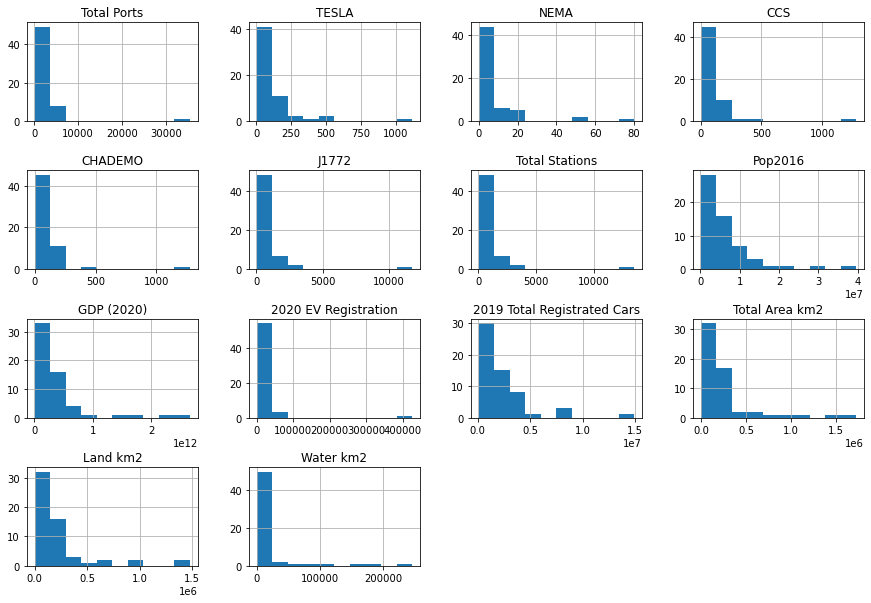

In [37]:
#Plot the histogram for each column
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

As we can see that for Total ports, EV Registration, Totat Stations have outliers, i.e. California. So we will try to plot without California data:

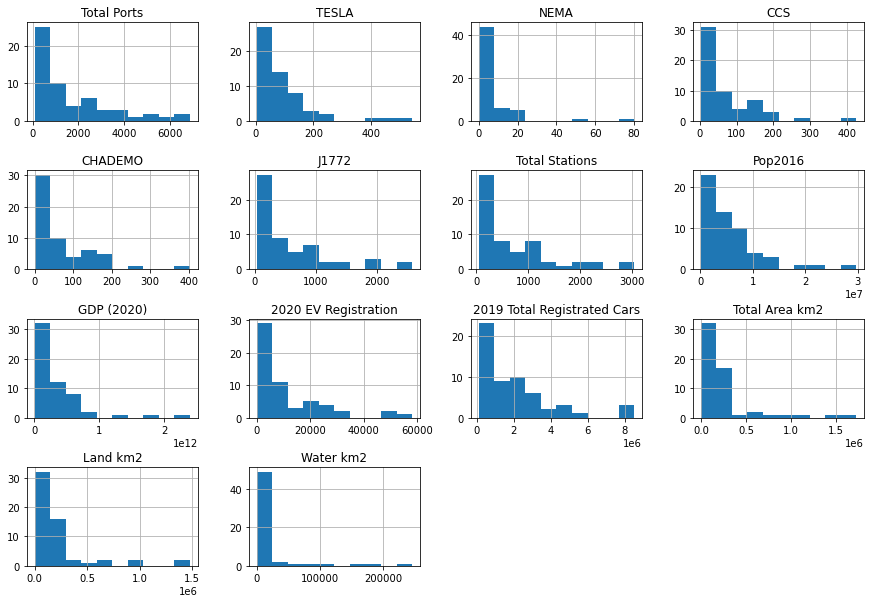

In [38]:
df[df['State']!='CA'].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## 3.2 Explore the Relationship between Each Variable and the Target

In [39]:
#Another way to explore this
df.corr()['Total Stations']

Total Ports                    0.998138
TESLA                          0.929739
NEMA                           0.451396
CCS                            0.971330
CHADEMO                        0.972899
J1772                          0.999677
Total Stations                 1.000000
Pop2016                        0.811823
GDP (2020)                     0.714813
2020 EV Registration           0.962141
2019 Total Registrated Cars    0.843759
Total Area km2                 0.177238
Land km2                       0.185160
Water km2                      0.098620
Name: Total Stations, dtype: float64

It is interested to see that they is a strong correlation between 2020 EV Registration and the number of total stations. It is not surprised to see Total number of EVs versus Total Stations. However, how EV Registration in 2020 will affect the total number of chargin stations? Or does the EV charging stations affect the number of EV being purchased?

<AxesSubplot:xlabel='2020 EV Registration', ylabel='Total Stations'>

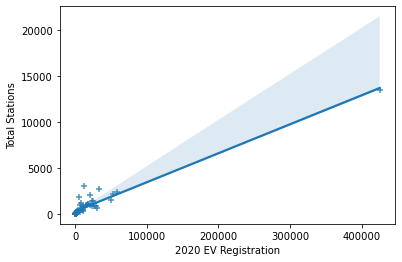

In [40]:
sns.regplot(x='2020 EV Registration',y='Total Stations',data=df,marker='+')

In [41]:
#We can see a big outlier in the 2020 EV Registration and Total Stations. 
#Let's take it out to check the correlation again
df_clean=df[df['State']!='CA']
df_clean.corr()['Total Stations']

Total Ports                    0.991291
TESLA                          0.846479
NEMA                           0.180488
CCS                            0.849814
CHADEMO                        0.848544
J1772                          0.997944
Total Stations                 1.000000
Pop2016                        0.777866
GDP (2020)                     0.555053
2020 EV Registration           0.744168
2019 Total Registrated Cars    0.809566
Total Area km2                 0.293768
Land km2                       0.293740
Water km2                      0.249930
Name: Total Stations, dtype: float64

<AxesSubplot:xlabel='2020 EV Registration', ylabel='Total Stations'>

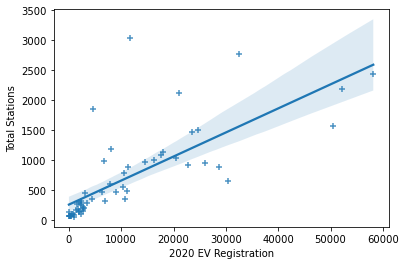

In [42]:
# Relationship between Total Registrated Cars in 2019, including EV and total charging stations
sns.regplot(x='2020 EV Registration',y='Total Stations',data=df_clean,marker='+')

It seems that by removing the outlier, there is some improvements in fitting the linear regression model. Let's check this out by using Bootstrip method to calculate the 95% confidence intervals for the slope and intersection

In [43]:
#Build a function for Bootstrip
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [44]:
df_clean=df_clean.reset_index()

In [45]:
# Compute the linear regressions
slope, intercept = np.polyfit(df['2020 EV Registration'],df['Total Stations'],1)
slope_clean, intercept_clean = np.polyfit(df_clean['2020 EV Registration'],df_clean['Total Stations'],1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps, bs_intercept_reps = \
        draw_bs_pairs_linreg(df['2020 EV Registration'],df['Total Stations'],1000)
bs_slope_reps_clean, bs_intercept_reps_clean = \
        draw_bs_pairs_linreg(df_clean['2020 EV Registration'],df_clean['Total Stations'],1000)

# Compute confidence intervals of slopes
slope_conf_int = np.percentile(bs_slope_reps,[2.5,97.5])
slope_conf_int_clean = np.percentile(bs_slope_reps_clean,[2.5,97.5])
intercept_conf_int = np.percentile(bs_intercept_reps,[2.5,97.5])
intercept_conf_int_clean = np.percentile(bs_intercept_reps_clean,[2.5,97.5])

#Print them out
print('Considering CA: slope =', slope,
      'conf int =', slope_conf_int)
print('Considering CA: intercept =', intercept,
      'conf int =', intercept_conf_int)
print('Not considering CA: slope =', slope_clean,
      'conf int =', slope_conf_int_clean)
print('Not considering CA: intercept =', intercept_clean,
      'conf int =', intercept_conf_int_clean)

Considering CA: slope = 0.031470256777332103 conf int = [0.0308882  0.04864701]
Considering CA: intercept = 344.68162592970896 conf int = [161.30392541 471.45334295]
Not considering CA: slope = 0.040217962957674734 conf int = [0.03260317 0.05497043]
Not considering CA: intercept = 253.52506808859707 conf int = [134.82642185 386.62140136]


<AxesSubplot:xlabel='Pop2016', ylabel='Total Stations'>

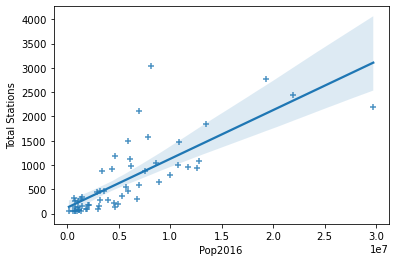

In [46]:
# Relationship between Populations, including EV and total charging stations
sns.regplot(x='Pop2016',y='Total Stations',data=df_clean,marker='+')

## 3.2 Assessing interactions between variables

<AxesSubplot:>

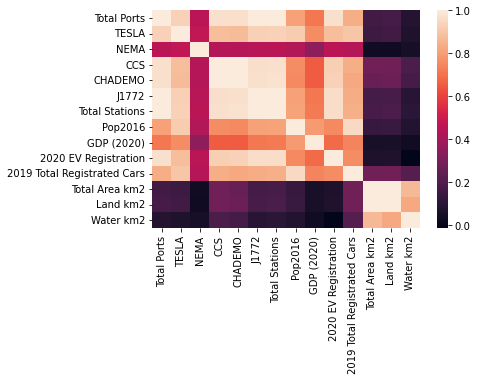

In [47]:
#As the first step, we can explore the correlation of each pair of parameters
sns.heatmap(df.corr())

<AxesSubplot:>

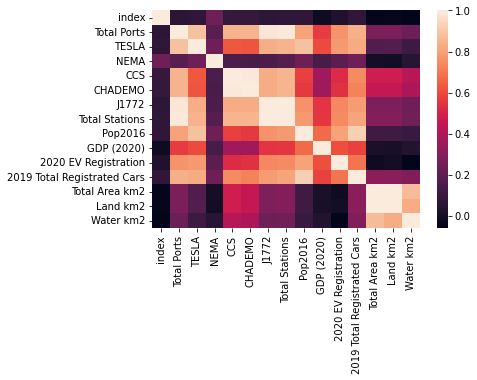

In [48]:
# If we take California as an outlier out, we will get
sns.heatmap(df_clean.corr())

In [49]:
#Another correlation form
df_clean.corr()

index  Total Ports     TESLA      NEMA  \
index                        1.000000     0.062431  0.074598  0.241132   
Total Ports                  0.062431     1.000000  0.880020  0.183377   
TESLA                        0.074598     0.880020  1.000000  0.240031   
NEMA                         0.241132     0.183377  0.240031  1.000000   
CCS                          0.086566     0.844437  0.628226  0.148477   
CHADEMO                      0.085668     0.843456  0.623106  0.147308   
J1772                        0.065245     0.986642  0.830638  0.155340   
Total Stations               0.072198     0.991291  0.846479  0.180488   
Pop2016                      0.073808     0.802602  0.881114  0.237426   
GDP (2020)                  -0.019273     0.568966  0.602685  0.137894   
2020 EV Registration         0.028044     0.764665  0.780194  0.195503   
2019 Total Registrated Cars  0.075325     0.836212  0.825943  0.239107   
Total Area km2              -0.047740     0.271734  0.160827  0.001645   
Land km2                    -0.044859     0.271605  0.164978 -0.006080   
Water km2                   -0.059310     0.231854  0.109734  0.051641   

                                  CCS   CHADEMO     J1772  Total Stations  \
index                        0.086566  0.085668  0.065245        0.072198   
Total Ports                  0.844437  0.843456  0.986642        0.991291   
TESLA                        0.628226  0.623106  0.830638        0.846479   
NEMA                         0.148477  0.147308  0.155340        0.180488   
CCS                          1.000000  0.993901  0.826878        0.849814   
CHADEMO                      0.993901  1.000000  0.826804        0.848544   
J1772                        0.826878  0.826804  1.000000        0.997944   
Total Stations               0.849814  0.848544  0.997944        1.000000   
Pop2016                      0.579916  0.562986  0.763360        0.777866   
GDP (2020)                   0.361888  0.362298  0.552396        0.555053   
2020 EV Registration         0.524339  0.544246  0.736544        0.744168   
2019 Total Registrated Cars  0.743944  0.722831  0.788882        0.809566   
Total Area km2               0.479955  0.457487  0.276943        0.293768   
Land km2                     0.478644  0.456685  0.276421        0.293740   
Water km2                    0.416555  0.394143  0.238834        0.249930   

                              Pop2016  GDP (2020)  2020 EV Registration  \
index                        0.073808   -0.019273              0.028044   
Total Ports                  0.802602    0.568966              0.764665   
TESLA                        0.881114    0.602685              0.780194   
NEMA                         0.237426    0.137894              0.195503   
CCS                          0.579916    0.361888              0.524339   
CHADEMO                      0.562986    0.362298              0.544246   
J1772                        0.763360    0.552396              0.736544   
Total Stations               0.777866    0.555053              0.744168   
Pop2016                      1.000000    0.672183              0.803196   
GDP (2020)                   0.672183    1.000000              0.608302   
2020 EV Registration         0.803196    0.608302              1.000000   
2019 Total Registrated Cars  0.919567    0.585274              0.689998   
Total Area km2               0.118243    0.013016             -0.014612   
Land km2                     0.118302    0.008943             -0.007562   
Water km2                    0.100143    0.037557             -0.058268   

                             2019 Total Registrated Cars  Total Area km2  \
index                                           0.075325       -0.047740   
Total Ports                                     0.836212        0.271734   
TESLA                                           0.825943        0.160827   
NEMA                                            0.239107        0.001645   
CCS                              

As we can see, a few linear relationships stand out (Correlation Coefficient > 0.8), including:
1) Total Ports and Total Stations (Obviously)

2) 2019 Total Registrated Cars and Population (0.91, vesy strong)

3) CCS and CHADEMO (are they installed together?)

4) 2020 EV Registration and Population

5) Total Ports and 2019 Total Registrated Cars

6) 2019 Total Registrated Cars and Tesla Ports

## 3.4 Exploring data across many dimensions

### 3.4.1 3 Dimensional Exploration

To explore data across many dimensions, the inital thing that we can start is to see if there are any patterns from different countries. 

<AxesSubplot:xlabel='2020 EV Registration', ylabel='Total Stations'>

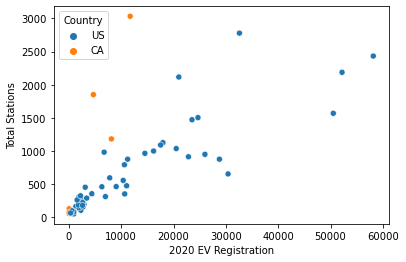

In [50]:
sns.scatterplot(x='2020 EV Registration',y='Total Stations',data=df_clean,hue='Country')

As we can see, if we construct a line , the line of Canada can be steeper than the line for the US. This suggests that when there is a similar increasing number of EV Registrate every year, Canada may have more increases of EV Stations than the US.

### 3.4.2 PCA Approach

#### 3.4.2.1 Scale Data

As we can see, our data is very heterogenous, so using PCA method can sort out the most important features that affect our target, which is our total stations

In [51]:
df.head()

State  Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations Code  \
0    AK         88.0     13     0    5        6     34              48   AK   
1    AL        526.0     50     0   16       19    161             195   AL   
2    AR        457.0     39     0    8        7    136             160   AR   
3    AZ       2283.0    137     1   54       52    735             875   AZ   
4    BC       2953.0    183     8  196      183    904            1181   BC   

           Province  Pop2016    GDP (2020)  2020 EV Registration  \
0            Alaska   724357   50161000000                   940   
1           Alabama  4934193  196906100000                  2890   
2          Arkansas  3033946  114943500000                  1330   
3           Arizona  7520103  320550600000                 28770   
4  British Columbia  4648055  246927400000                  8133   

   2019 Total Registrated Cars Country  Total Area km2      Land km2  \
0                       178516      US    1.723338e+06  1.477954e+06   
1                      2109108      US    1.357673e+05  1.311700e+05   
2                       886647      US    1.377331e+05  1.347701e+05   
3                      2405959      US    2.952330e+05  2.942073e+05   
4                      3113125      CA    9.447350e+05  9.251860e+05   

      Water km2  
0  245383.42257  
1    4597.23225  
2    2960.35857  
3    1025.63604  
4   19549.00000

In [52]:
df_summary_scale = df.set_index('State')
#Save the state labels
df_summary_scale=df_summary_scale.drop(columns=['TESLA','NEMA','CCS','CHADEMO','J1772','Total Ports','Code', 'Province','Country'])
df_summary_index = df_summary_scale.index
#Save the column names 
df_summary_columns = df_summary_scale.columns
df_summary_scale = scale(df_summary_scale)
df_summary_scaled_df = pd.DataFrame(df_summary_scale, columns=df_summary_columns)
df_summary_scaled_df.head()

/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Total Stations   Pop2016  GDP (2020)  2020 EV Registration  \
0       -0.474932 -0.772254   -0.637287             -0.307045   
1       -0.394052 -0.180889   -0.353851             -0.271951   
2       -0.413309 -0.447821   -0.512160             -0.300026   
3       -0.019912  0.182359   -0.115034              0.193797   
4        0.148451 -0.221084   -0.257236             -0.177596   

   2019 Total Registrated Cars  Total Area km2  Land km2  Water km2  
0                    -0.789599        4.366171  4.178758   4.924755  
1                    -0.037124       -0.353664 -0.345808  -0.351142  
2                    -0.513595       -0.347820 -0.333713  -0.387008  
3                     0.078578        0.120426  0.201921  -0.429400  
4                     0.354205        2.051391  2.321714  -0.023532

#### 3.4.2.2 PCA Transformation

In [53]:
df_pca = PCA().fit(df_summary_scale)

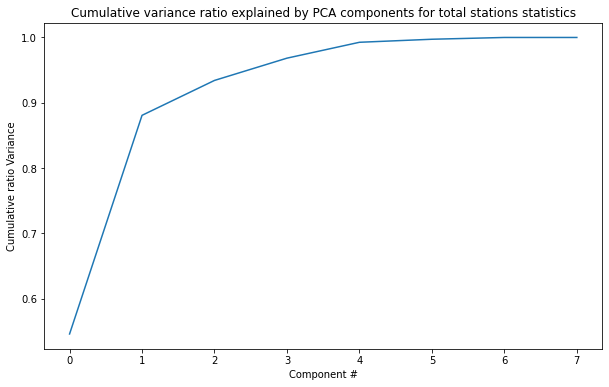

In [54]:
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio Variance')
plt.title('Cumulative variance ratio explained by PCA components for total stations statistics');

As we can see, two components can explain 90% of the variances!

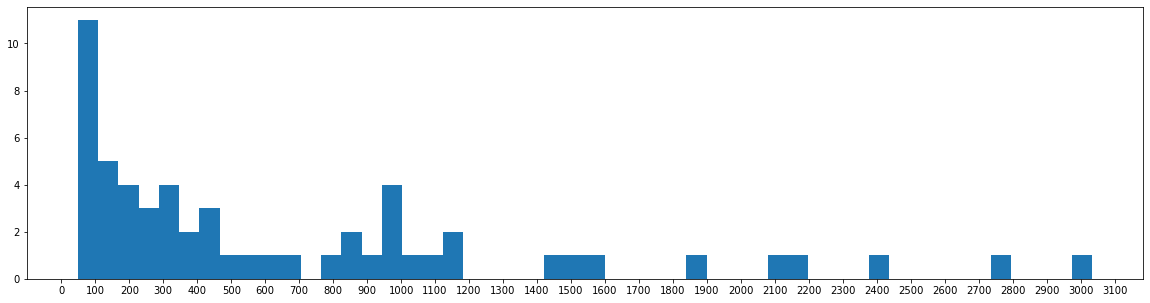

In [55]:
#Revisit the distribution of the total stations:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0, 3200, 100))
_ = plt.hist(df_clean['Total Stations'],bins=50)

In [56]:
df_pca_x = df_pca.transform(df_summary_scale)

In [57]:
pca_df = pd.DataFrame({'PC1': df_pca_x[:, 0], 'PC2': df_pca_x[:, 1]}, index=df_summary_index)
pca_df.head()

PC1       PC2
State                    
AK     1.022986  7.733323
AL    -0.699680 -0.386187
AR    -1.115022 -0.299391
AZ     0.138240 -0.095540
BC     0.761458  2.475008

In [58]:
Total = df[['State','Total Stations']].set_index('State')
Total.head()

Total Stations
State                
AK                 48
AL                195
AR                160
AZ                875
BC               1181

In [59]:
pca_df = pd.concat([pca_df, Total], axis=1)
pca_df.head()

PC1       PC2  Total Stations
State                                    
AK     1.022986  7.733323              48
AL    -0.699680 -0.386187             195
AR    -1.115022 -0.299391             160
AZ     0.138240 -0.095540             875
BC     0.761458  2.475008            1181

In [60]:
pca_df['Quartile'] = pd.qcut(pca_df['Total Stations'], q=4, precision=0)
pca_df.head()

PC1       PC2  Total Stations          Quartile
State                                                      
AK     1.022986  7.733323              48     (47.0, 155.0]
AL    -0.699680 -0.386187             195    (155.0, 402.0]
AR    -1.115022 -0.299391             160    (155.0, 402.0]
AZ     0.138240 -0.095540             875    (402.0, 994.0]
BC     0.761458  2.475008            1181  (994.0, 13512.0]

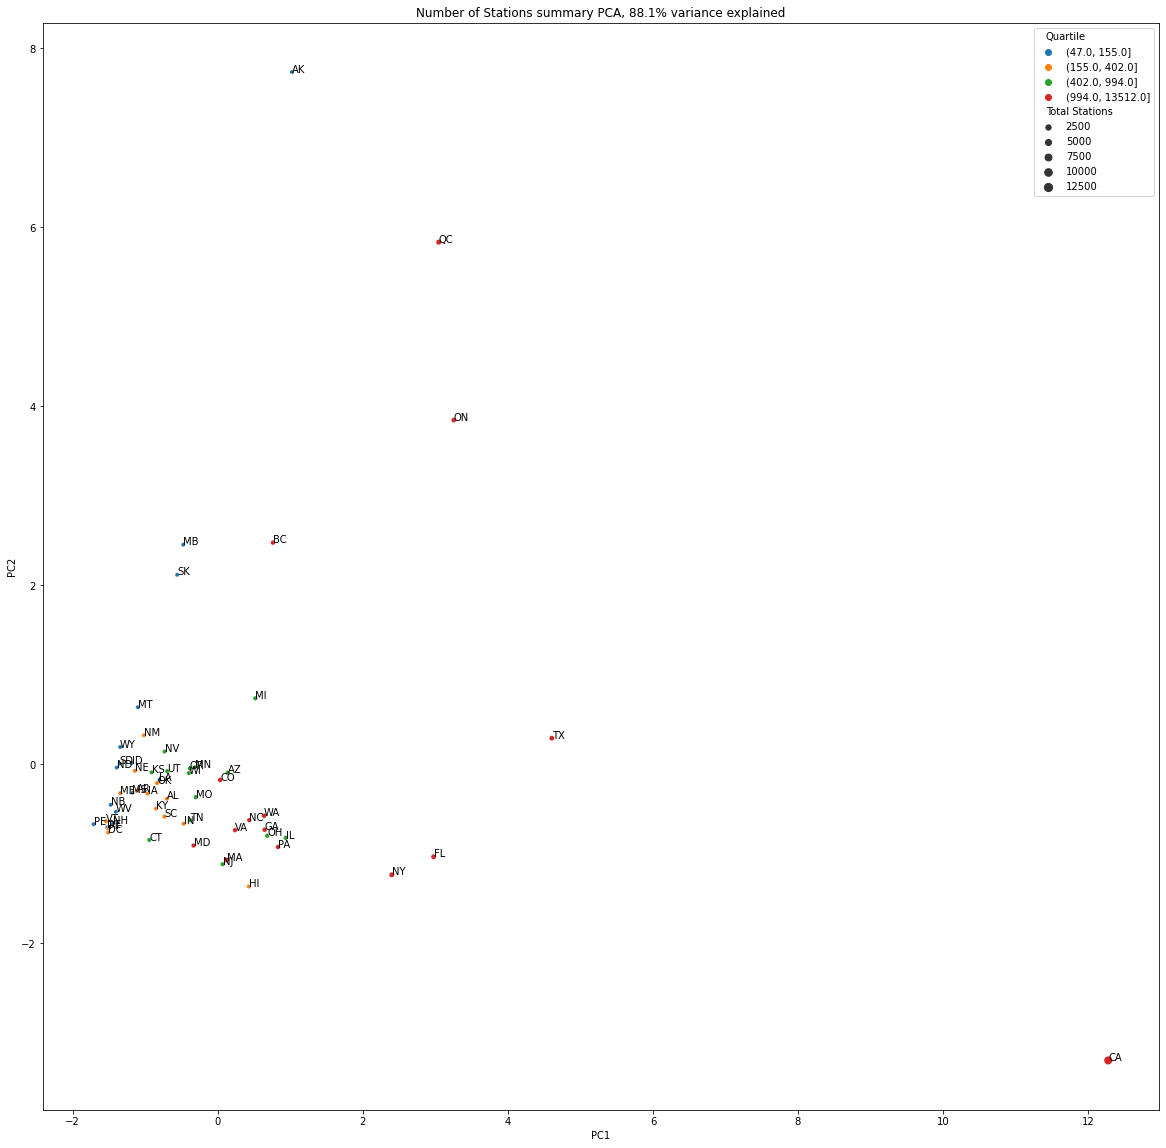

In [61]:
x = pca_df.PC1
y = pca_df.PC2
stations = pca_df['Total Stations']
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(20, 20))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, hue='Quartile', size=stations,
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Number of Stations summary PCA, {pc_var:.1f}% variance explained');

After the dimension is reduced, we did not see an obvious pattern. However, it seems that the blue dots are distributed at the left sections while red dots are distributed widely on the right sections. Yellow and green dots are in the middle and narrowly.

# 4.0 Pre-processing and Training Data Development <a id="4.0_Pre-processing_and_Training_Data_Development"></a>

## 4.1 Pre-processing Data

The preprocessing data will complete the following things: 

1) Process the data with large scales
2) Remove the unnecessary columns
3) Split the training data with the target State: Ontario
4) Hot code the categorical data
5) Split the training data and target data
5) Split the training set and test set

### 4.1.1 Process large-scale data

In [62]:
#Load the dataset
df.head()

State  Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations Code  \
0    AK         88.0     13     0    5        6     34              48   AK   
1    AL        526.0     50     0   16       19    161             195   AL   
2    AR        457.0     39     0    8        7    136             160   AR   
3    AZ       2283.0    137     1   54       52    735             875   AZ   
4    BC       2953.0    183     8  196      183    904            1181   BC   

           Province  Pop2016    GDP (2020)  2020 EV Registration  \
0            Alaska   724357   50161000000                   940   
1           Alabama  4934193  196906100000                  2890   
2          Arkansas  3033946  114943500000                  1330   
3           Arizona  7520103  320550600000                 28770   
4  British Columbia  4648055  246927400000                  8133   

   2019 Total Registrated Cars Country  Total Area km2      Land km2  \
0                       178516      US    1.723338e+06  1.477954e+06   
1                      2109108      US    1.357673e+05  1.311700e+05   
2                       886647      US    1.377331e+05  1.347701e+05   
3                      2405959      US    2.952330e+05  2.942073e+05   
4                      3113125      CA    9.447350e+05  9.251860e+05   

      Water km2  
0  245383.42257  
1    4597.23225  
2    2960.35857  
3    1025.63604  
4   19549.00000

In [63]:
#As we can see, there are some columns that have very high scale, i.e. Pop2016, GDP(2020),Total Registrated Cars, etc.
# So we can scale them to a more reasonable scale
df_processing=df
df_processing['M_Pop']=df_processing['Pop2016']/1000000
df_processing['B_GDP']=df_processing['GDP (2020)']/1000000000
df_processing['M_Reg_Cars']=df_processing['2019 Total Registrated Cars']/1000000
df_processing['M_Area']=df_processing['Total Area km2']/1000000
df_processing['M_Land']=df_processing['Land km2']/1000000
df_processing['M_Water']=df_processing['Water km2']/1000000
df_processing=df_processing.drop(columns=['Pop2016', 'GDP (2020)', '2019 Total Registrated Cars','Total Area km2','Land km2','Water km2'])
df_processing.head()

State  Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations Code  \
0    AK         88.0     13     0    5        6     34              48   AK   
1    AL        526.0     50     0   16       19    161             195   AL   
2    AR        457.0     39     0    8        7    136             160   AR   
3    AZ       2283.0    137     1   54       52    735             875   AZ   
4    BC       2953.0    183     8  196      183    904            1181   BC   

           Province  2020 EV Registration Country     M_Pop     B_GDP  \
0            Alaska                   940      US  0.724357   50.1610   
1           Alabama                  2890      US  4.934193  196.9061   
2          Arkansas                  1330      US  3.033946  114.9435   
3           Arizona                 28770      US  7.520103  320.5506   
4  British Columbia                  8133      CA  4.648055  246.9274   

   M_Reg_Cars    M_Area    M_Land   M_Water  
0    0.178516  1.723338  1.477954  0.245383  
1    2.109108  0.135767  0.131170  0.004597  
2    0.886647  0.137733  0.134770  0.002960  
3    2.405959  0.295233  0.294207  0.001026  
4    3.113125  0.944735  0.925186  0.019549

### 4.1.2 Remove unnecessary columns and split trianing and target data

In [64]:
#Drop the target state: Ontario
df_training=df_processing[df_processing['State']!='ON']
      
#Save ontario data to ontario
ontario=df_processing[df_processing['State']=='ON']
ontario.T

40
State                        ON
Total Ports              5282.0
TESLA                       244
NEMA                         17
CCS                         279
CHADEMO                     254
J1772                      1524
Total Stations             1850
Code                         ON
Province                Ontario
2020 EV Registration       4693
Country                      CA
M_Pop                 13.448494
B_GDP                   713.444
M_Reg_Cars             8.514952
M_Area                 1.076395
M_Land                 0.917741
M_Water                0.158654

In [65]:
#Drop the unncessary ports data, state, province, code data
df_training = df_training.drop(columns=['State', 'Code', 'Province'])
df_training.head()

Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations  \
0         88.0     13     0    5        6     34              48   
1        526.0     50     0   16       19    161             195   
2        457.0     39     0    8        7    136             160   
3       2283.0    137     1   54       52    735             875   
4       2953.0    183     8  196      183    904            1181   

   2020 EV Registration Country     M_Pop     B_GDP  M_Reg_Cars    M_Area  \
0                   940      US  0.724357   50.1610    0.178516  1.723338   
1                  2890      US  4.934193  196.9061    2.109108  0.135767   
2                  1330      US  3.033946  114.9435    0.886647  0.137733   
3                 28770      US  7.520103  320.5506    2.405959  0.295233   
4                  8133      CA  4.648055  246.9274    3.113125  0.944735   

     M_Land   M_Water  
0  1.477954  0.245383  
1  0.131170  0.004597  
2  0.134770  0.002960  
3  0.294207  0.001026  
4  0.925186  0.019549

### 4.1.3 Hot code the categorical data


In [66]:
#One hot coding using Pandas.get_dummies function
df_training=pd.get_dummies(df_training, columns = ['Country'])
df_training.drop(columns=['Country_US']).head()

Total Ports  TESLA  NEMA  CCS  CHADEMO  J1772  Total Stations  \
0         88.0     13     0    5        6     34              48   
1        526.0     50     0   16       19    161             195   
2        457.0     39     0    8        7    136             160   
3       2283.0    137     1   54       52    735             875   
4       2953.0    183     8  196      183    904            1181   

   2020 EV Registration     M_Pop     B_GDP  M_Reg_Cars    M_Area    M_Land  \
0                   940  0.724357   50.1610    0.178516  1.723338  1.477954   
1                  2890  4.934193  196.9061    2.109108  0.135767  0.131170   
2                  1330  3.033946  114.9435    0.886647  0.137733  0.134770   
3                 28770  7.520103  320.5506    2.405959  0.295233  0.294207   
4                  8133  4.648055  246.9274    3.113125  0.944735  0.925186   

    M_Water  Country_CA  
0  0.245383           0  
1  0.004597           0  
2  0.002960           0  
3  0.001026           0  
4  0.019549           1

In [67]:
df_training.shape

(57, 16)

### 4.1.5 Trianing/Test Data Split


In [68]:
#Training/Test Data Split using Sklearn train_test_split function
from sklearn.model_selection import train_test_split
X_train_o, X_test, y_train, y_test = train_test_split(df_training.drop(columns='Total Stations'), 
                                                    df_training['Total Stations'], test_size=0.2, 
                                                    random_state=47)

In [69]:
#Validate the split
X_train_o.shape

(45, 15)

### 4.1.6 Scale the Training Set and Transform the Test Set

In [70]:
#Fit and transform X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_o)

#Fit X_train and transform X_test
X_test = scaler.transform(X_test)

# 5.0 Training and Testing <a id="5.0_Training_and_Testing"></a>

In the last section, the dataset has been splited, standard scaled. In the following section, the dataset will be used to train models:

1) Linear Regression Model

2) Random Forest Model

3) XGBoost


## 5.1 Linear Regression Model

### 5.1.1 Simple Training and Testing

In [71]:
#Import LinearRegression Package
from sklearn.linear_model import LinearRegression

#Fit the training set
reg = LinearRegression().fit(X_train, y_train)

#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

### 5.1.2 Model Evaluator

Since this is a regression model, we will consider the following three evaluators:

1) R2 Score

2) MSE

3) MAE

In [72]:
#Import functions from sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [73]:
#R2 Score for each set
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9999863296226498, 0.9956117218901003)

In [74]:
#MAE, MSE for each set
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(5.429820042909312, 21.841098005265664)

As we can see, the linear regression model did a pretty good job in predicting both training set and test set.

However, can we make it better? Is it because the model is overfitting the dataset?

We can induce the SelectKBest to see whether there are any parameters that are not necessarily in this model. Also, we can use CrossValidation to check if the model is overfitting.

### 5.1.3 Cross Validation

In [84]:
#Cross Validation method used on LinearRegression model
from sklearn.model_selection import cross_validate
cv_results = cross_validate(LinearRegression(), X_train, y_train, cv=10)
cv_scores = cv_results['test_score']
#Print all R2 scores in each fold
print(cv_scores)

#Print the mean R2 scores and standard deviation
print(np.mean(cv_scores), np.std(cv_scores))

[0.99948393 0.99986354 0.99738154 0.99986175 0.99811294 0.99738497
 0.99990545 0.99849439 0.99975632 0.99973012]
0.9989974944197113 0.0009958731182985868


### 5.1.4 Grid Search for best k columns

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

#Define a pipeline
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

#Use GridSearchCV to find the best k values
#Define k and k in range 2 to the maximum number of columns
k = [k+1 for k in range(len(X_train_o.columns))]
grid_params = {'selectkbest__k': k}

#Train the GridSearchCV
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

#find the best k
lr_grid_cv.best_params_

{'selectkbest__k': 14}

In [85]:
lr_grid_cv.cv_results_

{'mean_fit_time': array([0.00159302, 0.00153184, 0.00215688, 0.002459  , 0.00237041,
        0.00206103, 0.00211802, 0.00189838, 0.0019722 , 0.00189748,
        0.00202122, 0.002284  , 0.002174  , 0.00201797, 0.00178885]),
 'std_fit_time': array([7.35802535e-05, 5.43577629e-05, 1.54269209e-04, 1.67665967e-04,
        2.90778622e-04, 2.45157774e-04, 1.15137918e-04, 2.53481027e-04,
        1.66628696e-04, 1.62501500e-04, 2.09761560e-04, 2.45864073e-04,
        3.46928923e-04, 1.31586149e-04, 1.48881970e-04]),
 'mean_score_time': array([0.0005353 , 0.00050831, 0.00067992, 0.00079556, 0.00073481,
        0.00065136, 0.00062656, 0.00059795, 0.00054803, 0.00062585,
        0.00065417, 0.00078382, 0.00068045, 0.00060797, 0.000524  ]),
 'std_score_time': array([3.16191579e-05, 3.03026169e-05, 1.67500915e-04, 4.77155103e-05,
        1.54898186e-04, 1.52584612e-04, 1.00548326e-04, 9.95186681e-05,
        5.16928869e-05, 1.08924471e-04, 1.34648581e-04, 1.42021175e-04,
        1.13437044e-04, 9.87

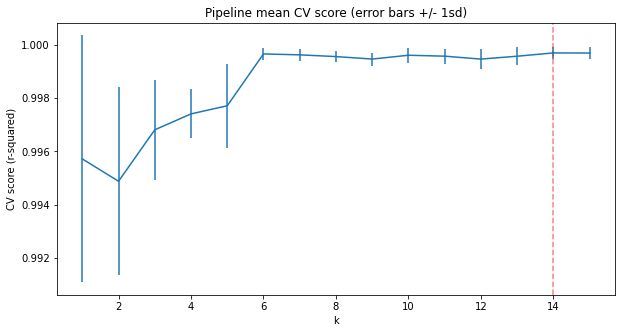

In [79]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

As we can see from the figure above, cross validation method provides the average R2 scores for each of the k value tested from 1 to 15. At k=14, the R2 score achieved the highest. However, when k=6, the score does not change significantly. It seems that the differences between k=6 and k=14 were not statistically significant, either. 

In [80]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train_o.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

M_Area                  584131.771270
J1772                     1815.039716
CCS                        303.735897
TESLA                       85.365061
2020 EV Registration        54.465121
NEMA                        16.449618
M_Pop                       15.048024
Country_US                   2.949497
M_Reg_Cars                   0.812409
B_GDP                      -28.449688
Total Ports                -75.374015
CHADEMO                   -151.646280
M_Water                 -74050.902169
M_Land                 -519069.926543
dtype: float64

### 5.1.5 Evaluate the Best-Estimator-Model Performance

In [86]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(12.093974435216733, 8.103590359048631)

In [87]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

21.841098005546936

The mean absolute error for the test set is greater than for the training set. The model might be overfitting.

In [112]:
r2_score(y_test, lr_grid_cv.best_estimator_.predict(X_test))

0.9956117218899576

### 5.1.6 Refining the model

To solve the issue of the overfitting, we can try to use only the most important 6 parameters to train the model. 

In [119]:
selected_columns = ['M_Area','J1772', 'CCS', 'CHADEMO','2020 EV Registration','M_Land']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_training[selected_columns], 
                                                    df_training['Total Stations'], test_size=0.2, 
                                                    random_state=47)

In [120]:
#Fit the training set
reg = LinearRegression().fit(X_train_s, y_train_s)

#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_train_s_pred = reg.predict(X_train_s)
y_test_s_pred = reg.predict(X_test_s)

#R2 Score for each set
r2_score(y_train_s, y_train_s_pred), r2_score(y_test_s, y_test_s_pred)

(0.999774308235937, 0.9959863759937841)

In [121]:
#MAE for each set
mean_absolute_error(y_train_s, y_train_s_pred), mean_absolute_error(y_test_s, y_test_s_pred)

(22.09369049462014, 31.4496421951275)

The difference between the MAE for training set and test set is getting smaller.

## 5.2 Random Forest Model

Random Forest Model have a number of hyperparameters. So, we can use randomsearch to find the best estimator (if we use random search, the combination of the hyperparameters will be in a huge number and will take very long time to process). The following hyperparameters can be considered in this case, including:

1) Number of Estimators

2) Maximum Depth

3) Maximum features: max number of features considered for splitting a node

4) Mininum samples_split: mininum number of data points placed in a node before the node is split

5) Minimum samples leaf = minimum number of data points allowed in a leaf node

6) bootstrap: method for sampling data points (with or without replacement)


In [88]:
#Set n_est as the number of Estimators
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]

#Set Maximum Depth, including a None as no limit
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Set maximum features
max_features = ['auto', 'sqrt']

#Set minimum sample split
min_samples_split = [2, 5, 10]

#Set minimum samples leaf
min_samples_leaf = [1, 2, 4]

#Set bootstrap
bootstrap = [True, False]

In [89]:
# Create the random grid
param_grid = {'n_estimators': n_est,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 12, 16, 20, 26, 33,
                                                         42, 54, 69, 88, 112,
                                                         143, 183, 233, 297,
                                                         379, 483, 615, 784,
                                                         1000]},
                   

In [92]:
#Print the best parameters
rf_random.best_params_

{'n_estimators': 16,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [93]:
#Print the evaluation score of the model as MAE
rf_neg_mae = cross_validate(rf_random.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(384.6694444444444, 530.2679346112226)

In [96]:
mean_absolute_error(y_test, rf_random.best_estimator_.predict(X_test))

291.0885416666667

In [111]:
#As we can see, the mean MAE is 384 and STD is 530. 
#It is very different from what we have in the Linear Regression Model
#Print the test scores for the RandomSearchCV
r2_score(y_test, rf_random.best_estimator_.predict(X_test))

-0.11033966870727396

The maximum score for the randomsearchCV testing is 0.69, which is much smaller than the regression model

## 5.3 XGBoost

### 5.3.1 XGBoost Training and Testing

First, we will install the XGBoost in the following area. Then we will do a general training with the default and common hyperparameters for XGBoost Regression model. Then we will use randomsearchCV to search for the best estimator for the model

In [98]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 2.6 MB/s eta 0:00:01


In [102]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators=100, n_jobs=2,
                            booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

#Print MAE and MSE for training sets
print(mean_absolute_error(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred))

#Print R2 Score for training sets
print(r2_score(y_train, y_train_pred))

#Print MAE and MSE for test sets
print(mean_absolute_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred))

#Print R2 Score for test sets
print(r2_score(y_test, y_test_pred))

35.89564776950412 27061.08937960259
0.9933667051022129
49.5252488454183 4279.300962376413
0.9916927221891197


The R2 Score seems to be pretty well. Then we can see if there are any improvements with tuning the hyperparameters

### 5.3.2 Random Search for XGBoost Model

In [115]:
import xgboost as xgb
#Set parameters
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.05, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

#Fit the randomizedSearchCV model with the parameters
xgb_reg_cv = xgb.XGBRegressor()
xgb_random = RandomizedSearchCV(estimator=xgb_reg_cv,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
xgb_random.fit(X_train, y_train)
xgb_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.8999999999999999,
 'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 0.3,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7999999999999999}

In [116]:
xgb_neg_mae = cross_validate(xgb_random.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_mae_mean = np.mean(-1 * xgb_neg_mae['test_score'])
xgb_mae_std = np.std(-1 * xgb_neg_mae['test_score'])
xgb_mae_mean, xgb_mae_std

(332.0706361558702, 443.7742777835404)

In [117]:
mean_absolute_error(y_test, xgb_random.best_estimator_.predict(X_test))

58.06812604268392

In [118]:
r2_score(y_test, xgb_random.best_estimator_.predict(X_test))

0.9864167287574473

It seems that the random search did not reach higher R2 Score as the initial model. This probably be caused by the random search function, which only tested the combined hyperparameters randomly.

Let's try some grid search by limiting the value of max_depth, gamma, eta, reg_alpha, and reg_lambda. Based on research, the following techniques can deal with smaller datasets, including:

1) Restricting the maximum depth of trees via max_depth (low values)

2) Making the model more conservative via gamma and eta (high values)

3) L1 and L2 regularization via reg_alpha and reg_lambda (high values)

### 5.3.3 Grid Search

In [125]:
#Set parameters
params = { 'max_depth': [3,6,10],
           'gamma': [0.2, 0.8],
            'reg_alpha': [0.2, 0.8],
            'reg_lambda': [0.2, 0.8],
           'n_estimators': [100]}

#Fit the randomizedSearchCV model with the parameters
xgb_reg_cv = xgb.XGBRegressor()
#Train the GridSearchCV
xgb_grid_cv = GridSearchCV(xgb_reg_cv, param_grid=params, cv=5, n_jobs=-1)
xgb_grid_cv.fit(X_train, y_train)

#find the best k
xgb_grid_cv.best_params_


{'gamma': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0.2,
 'reg_lambda': 0.8}

In [126]:
mean_absolute_error(y_test, xgb_grid_cv.best_estimator_.predict(X_test))

63.35254923502604

In [127]:
r2_score(y_test, xgb_grid_cv.best_estimator_.predict(X_test))

0.9860571069288674

## 5.4 Robust Regression — RANSAC

The robust regression model can reduce the affect of outliers, which may be effective in this dataset.

In [137]:
from sklearn.linear_model import RANSACRegressor

# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=10, 		# Number of Iterations
                        residual_threshold=50 	# Threshold
                        )

# Train model
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=10,
                residual_threshold=50)

In [138]:
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)

#R2 Score for each set
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.999985858440417, 0.9952348366549784)

As we can see, the model performs pretty well. Since there are a few parameters that can be tried, we may perform a grid search to explore the best estimator.

In [147]:
#Set parameters
params_cv = { 'max_trials':[5, 10, 50, 100],
         'residual_threshold': [1,10,50,100,200,1000]
         }

#Fit the randomizedSearchCV model with the parameters
ransac_gs = RANSACRegressor(LinearRegression(), random_state=42)
#Train the GridSearchCV
ransac_grid_cv = GridSearchCV(ransac_gs, param_grid=params_cv, cv=5, n_jobs=-1)
ransac_grid_cv.fit(X_train, y_train)

#find the best estimator
ransac_grid_cv.best_params_

{'max_trials': 5, 'residual_threshold': 200}

In [148]:
r2_score(y_train, ransac_grid_cv.best_estimator_.predict(X_train))

0.9999667423203505

In [149]:
r2_score(y_test, ransac_grid_cv.best_estimator_.predict(X_test))

0.9962516935033762

In [150]:
mean_absolute_error(y_test, ransac_grid_cv.best_estimator_.predict(X_test))

20.518260200946006

MAE has reached the lowest among all models. This model has perfermed pretty well. We can visualize the performance of each model

## 5.4 Evaluation of Models

In [152]:
Models = ['Linear Regression','Random Forest','XGBoost','RANSAC']
MAEs = [mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test)),
       mean_absolute_error(y_test, rf_random.best_estimator_.predict(X_test)),
       mean_absolute_error(y_test, xgb_random.best_estimator_.predict(X_test)),
       mean_absolute_error(y_test, ransac_grid_cv.best_estimator_.predict(X_test))]
R2_Scores = [r2_score(y_test, lr_grid_cv.best_estimator_.predict(X_test)),
            r2_score(y_test, rf_random.best_estimator_.predict(X_test)),
            r2_score(y_test, xgb_grid_cv.best_estimator_.predict(X_test)),
            r2_score(y_test, ransac_grid_cv.best_estimator_.predict(X_test))]

d = {'Models':Models,'MAE': MAEs, 'R2_Scores': R2_Scores}
Model_Comp = pd.DataFrame(data=d)

Text(0, 0.5, 'MAE')

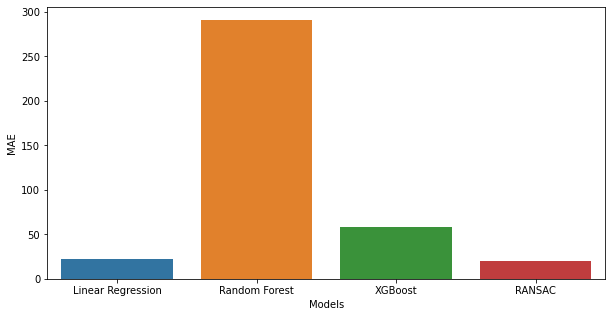

In [153]:
plt.subplots(figsize=(10, 5))
sns.barplot(x='Models', y='MAE', data=Model_Comp)
plt.xlabel('Models')
plt.ylabel('MAE')

Text(0, 0.5, 'R2 Score')

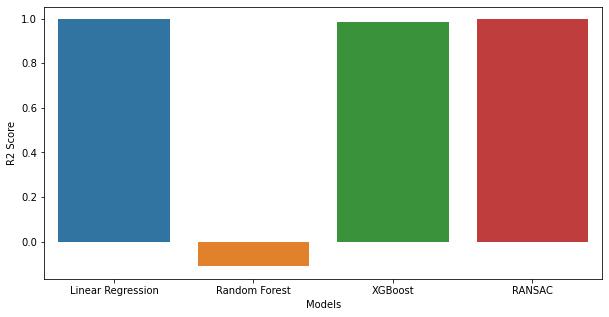

In [154]:
plt.subplots(figsize=(10, 5))
sns.barplot(x='Models', y='R2_Scores', data=Model_Comp)
plt.xlabel('Models')
plt.ylabel('R2 Score')

As we can see above, Linear Regression Model, XGBoost, and RANSAC Regression Model performs pretty well, as their R2 scores are all close to 1. However, XGBoost generated greater MAE. A possible reason is the sample size, as XGBoost is better for large datasets, while, this datasets are not that large (only 60 rows).

RANSAC and Linear Regression performs very similar, but RANSAC gets even lower MAE.